In [1]:
# In the previous chapter I described how to import the needed data to Pandas DataFrames, and how to 
# manipulate DataFrame object. Now lets take a look on how we can visualize that data in a plot form.
# This is by no means a proper analysis of the suicide rates. It is a plotting example.
# Below are the necessary imports. '%matplotlib inline' is IPython-specific directive which displays
# matplotlib plots in notebook. It can be removed and plt.show() can be added to the end of the code
# to display the plot. We are also importing numpy, pandas, matplotlib.pyplot for plotting, and 
# separately matplotlib to work on specific matplotlib functions if needed.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Next step is to import our data and assign it to DataFrame. We created that table in the previous
# example.

table = pd.read_excel('mergedData.xlsx')
table.head()

,Country,2015_s,2010_s,2015_p,2013_p,2010_p,2013_d,suiAve,suiPerDeath,deaPerPop
0,Afghanistan,5.5,5.2,32526.6,30682.5,27962.2,7.7,5.35,0.694805,0.77
1,Albania,4.3,5.3,2896.7,2883.3,2901.9,9.4,4.80,0.510638,0.94
2,Algeria,3.1,3.4,39666.5,38186.1,36036.2,5.7,3.25,0.570175,0.57
3,Angola,20.5,20.7,25022.0,23448.2,21220.0,13.9,20.60,1.482014,1.39
4,Antigua and Barbuda,0.0,0.2,91.8,90.0,87.2,6.8,0.10,0.014706,0.68


In [3]:
# We can create some variables to make our code easier to work with. In this tutorial I am planning to
# create a plot of Countries on x axis, and Suicide/Death % on y axis. 

x = table.index
y = table['suiPerDeath']
size = table['deaPerPop']
tLabels = table['Country']
yMax = round(y.max()) + 1
xMax = x.max() + 1
lightBlack = '#3e3e3e'

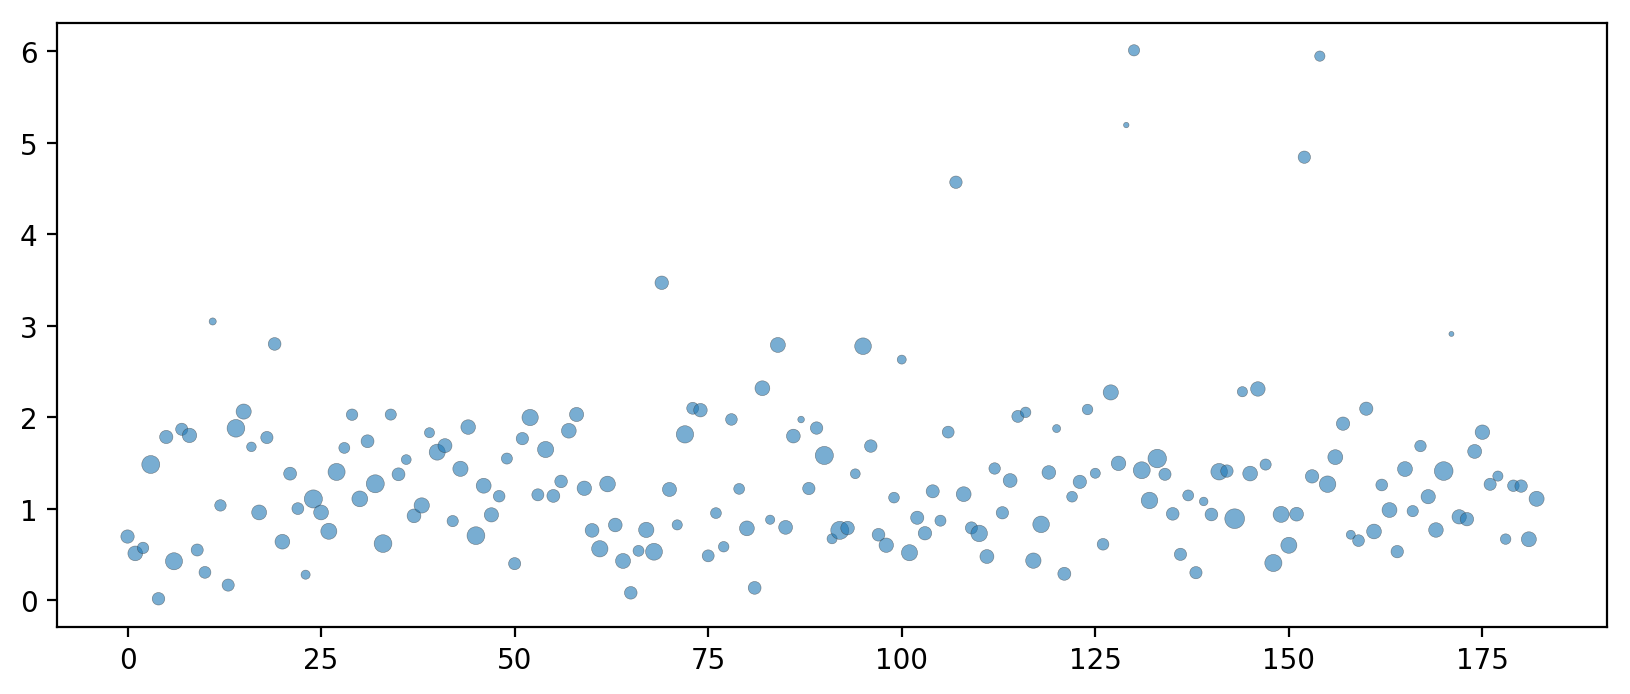

In [4]:
# Let's start by creating fig, and ax objects, defining the figure size and background color.
# We create a scatter plot by using x, and y variables defined earlier. The size of the circles are
# defined by Death/Population %. Alpha is set at 0.6 for the visibility of overlapping circles.

fig, ax = plt.subplots(figsize=(10, 4), dpi=200, facecolor='white')

im = ax.scatter(x, y, s=size * 30, alpha=0.6, linewidth='0.2', edgecolor=lightBlack)

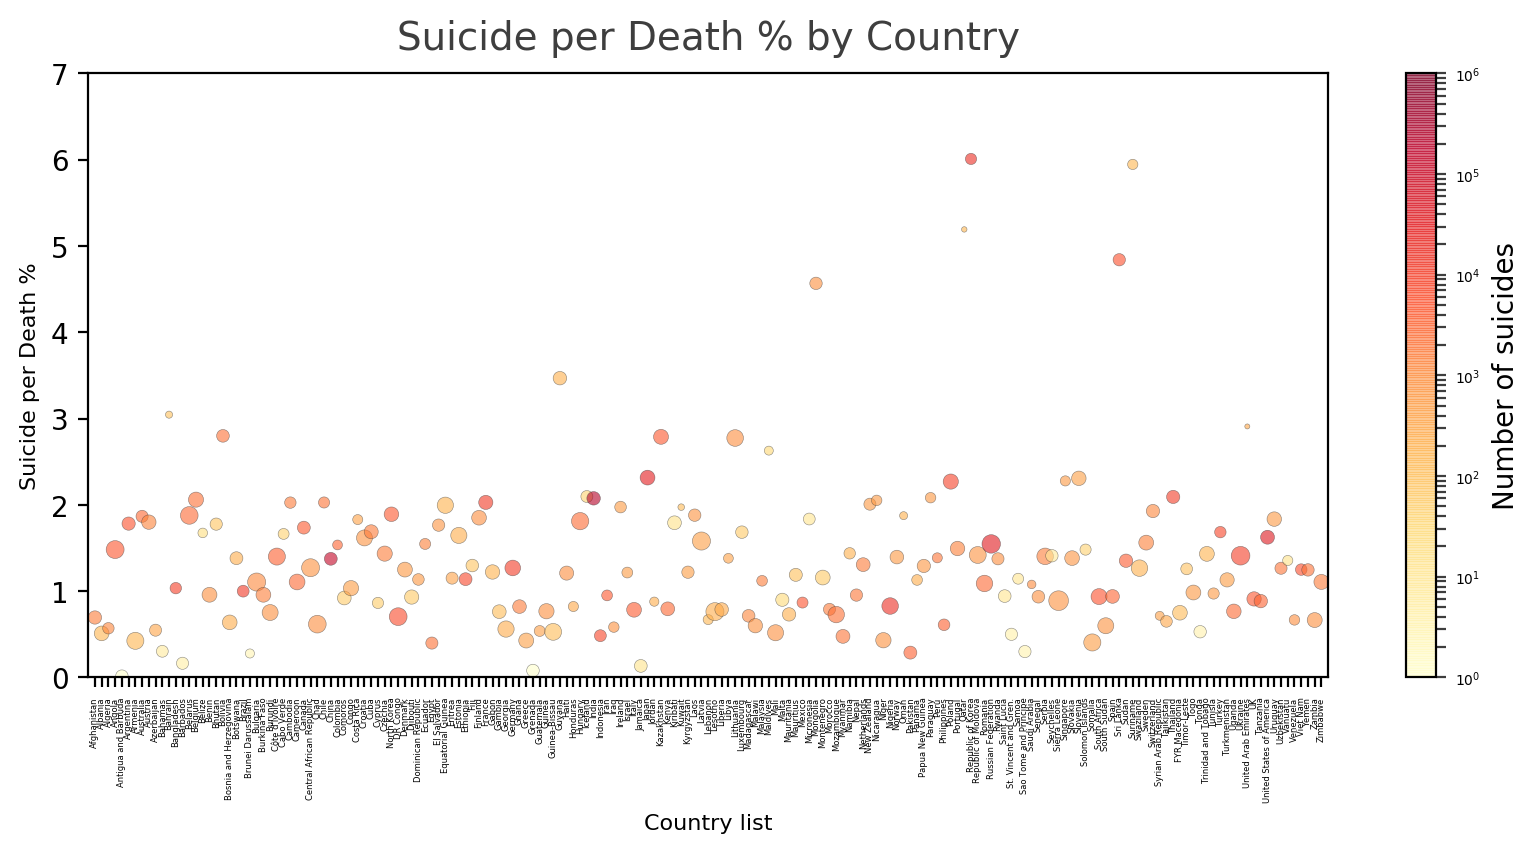

In [5]:
# It is a plot, but it doesn't provide us any useful information. We can introduce color and colorbar
# to the plot to make it readable. Also we can adjust plot limits, and add labels to the x axis.

fig, ax = plt.subplots(figsize=(10, 4), dpi=200, facecolor='white')

im = ax.scatter(x, y, s=size * 30, c=table['2010_s'] * table['2013_p'] / 100, 
                norm=mpl.colors.LogNorm(), cmap='YlOrRd', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='_nolegend_')

ax.set(xlim=[-1,xMax], ylim=[0, yMax], xticks=x)
im.set_clim(vmin=1, vmax=1000000)

# We can add labels to the x and y axes
ax.set_xlabel('Country list', fontsize=8)
ax.set_ylabel('Suicide per Death %', fontsize=8)

# Custom added plot title using 'ax.text' function
ax.text(0.5, 1.04, 'Suicide per Death % by Country', horizontalalignment='center',fontsize=14,
        color=lightBlack, transform = ax.transAxes)

# Setting x tick labels to the country list.
ax.set_xticklabels(tLabels, rotation='vertical', size=3)

# Adding colorbar and adjusting some parameters.
cbar = fig.colorbar(im, label='Number of suicides')
cbar.ax.tick_params(color=lightBlack, labelsize=5);

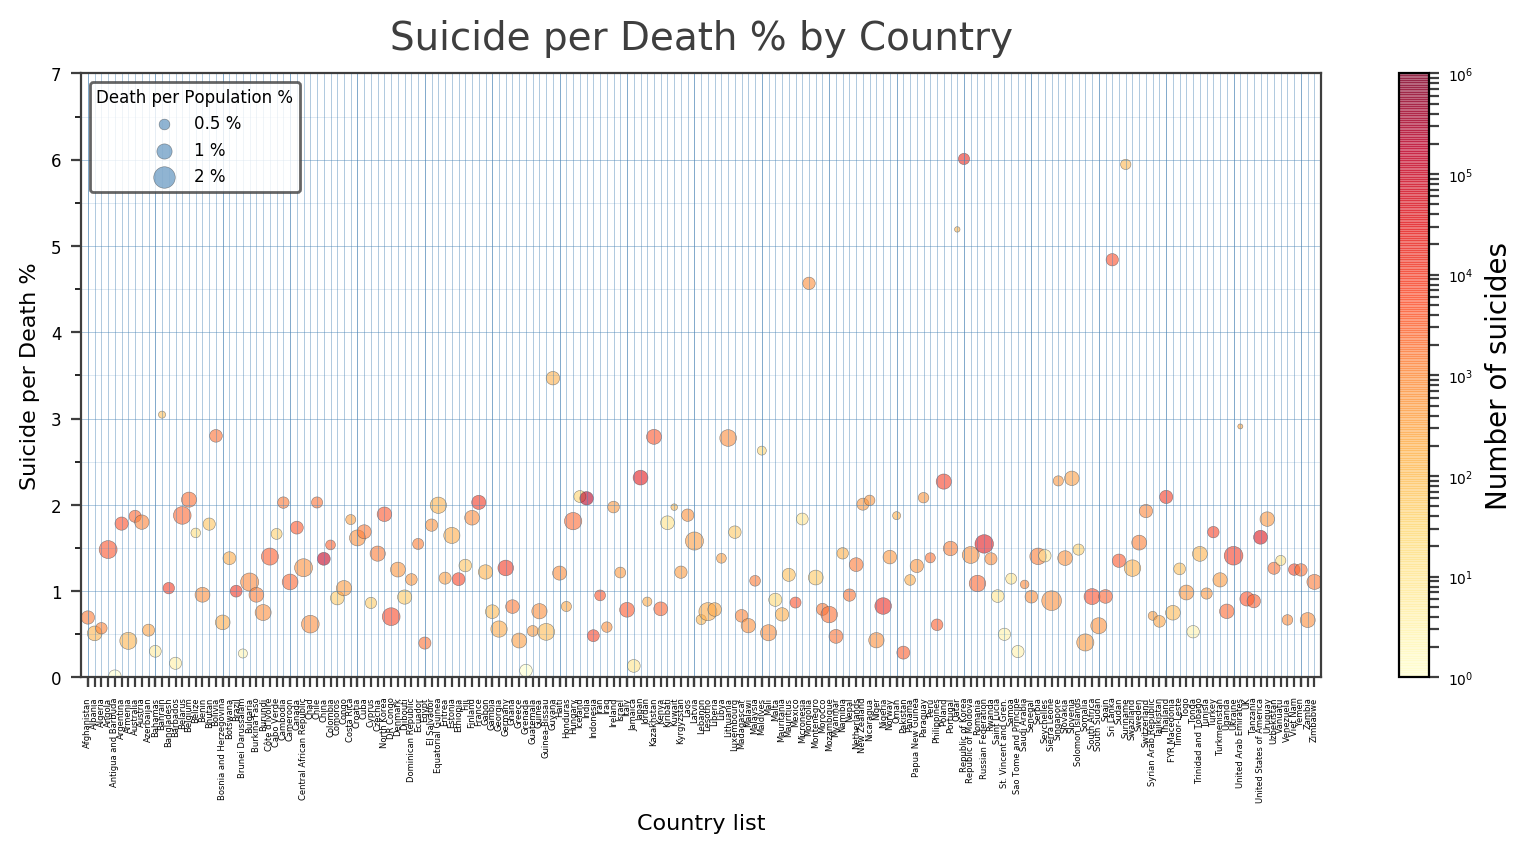

In [6]:
# Now that the plot is more readable, we can add ticks to it. Also we are going to add a plot legend.

fig, ax = plt.subplots(figsize=(10, 4), dpi=200, facecolor='white')

im = ax.scatter(x, y, s=size * 30, c=table['2010_s'] * table['2013_p'] / 100, 
                norm=mpl.colors.LogNorm(), cmap='YlOrRd', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='_nolegend_')

ax.set(xlim=[-1,xMax], ylim=[0, yMax], xticks=x)
im.set_clim(vmin=1, vmax=1000000)

# We can add labels to the x and y axes
ax.set_xlabel('Country list', fontsize=8)
ax.set_ylabel('Suicide per Death %', fontsize=8)

# Custom added plot title using 'ax.text' function
ax.text(0.5, 1.04, 'Suicide per Death % by Country', horizontalalignment='center',fontsize=14,
        color=lightBlack, transform = ax.transAxes)

# Setting x tick labels to the country list.
ax.set_xticklabels(tLabels, rotation='vertical', size=3)

# Adding colorbar and adjusting some parameters.
cbar = fig.colorbar(im, label='Number of suicides')
cbar.ax.tick_params(color=lightBlack, labelsize=5);

# Defining color of the ticks, and adjusting tick label size on y axis
ax.tick_params(color=lightBlack)
ax.yaxis.set_tick_params(labelsize=6)

# Adding minor ticks to the y axis
ax.set_yticks(np.arange(0.5, yMax, 1), minor=True)

# Adjusting color of all spines.
for sp in ax.get_children():
    if isinstance(sp, mpl.spines.Spine):
        sp.set_color(lightBlack)

# Adjusting colors, line parameters of the major and minor grid
minParm = dict(which='minor',color='steelblue', linestyle='-', linewidth=0.2, alpha=0.3)
ax.yaxis.grid(True, **minParm)
majParm = dict(which='major',color='steelblue', linestyle='-', linewidth=0.3, alpha=0.5)
ax.xaxis.grid(True, **majParm)
ax.yaxis.grid(True, **majParm)

# Adding extra tick lines every 10 ticks as a numpy array
extrTicks = np.arange(0, table.index.max(), 10).tolist()
plt.xticks(list(plt.xticks()[0]) + extrTicks)

# Here we are creating a new scatter plot to show it on the custom legend object.
for area in [0.5, 1, 2]:
    plt.scatter([], [], c='steelblue', alpha=0.6, s=area * 30, linewidth='0.2', edgecolor=lightBlack,
                label=str(area) + ' %')
pst = plt.legend(loc='upper left', scatterpoints=1, frameon=True, 
           fontsize='6',labelspacing=0.5, title='Death per Population %')
pst.get_frame().set_edgecolor(lightBlack)
pst.get_title().set_fontsize('6');

In [7]:
# The plot now can be saved to the file. Using 'bbox_inches='tight' function will remove unnecessary 
# blank spaces and save the image as we see it.

fig.savefig("SuiPerDeaPerCount.png", bbox_inches='tight')